In [1]:
#import packages
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

#Display all columns
pd.set_option('max_columns', 50)

In [2]:
#import data
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Task description:

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?



## 1. Basic Checks

From the task description we should have 100 unique customer in 3 month worth of data.

In [3]:
#Check for number of unique customers
print("We have {} unique customer".format(data.customer_id.nunique()))

We have 100 unique customer


In [4]:
#Date
data.date.describe()
#Augest, September and October should have 31+30+31=92 unique days

count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [5]:
#Check for the missing date with no transaction
missing_date = pd.date_range(start = '2018-08-01', end = '2018-10-31' ).difference(data.date)
missing_date
#The missing date is 2018-08-16

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

In [6]:
#Check for data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [7]:
#Check for unique values in each columns
print('Unique values:------------------------------------------------------------------')
for i in data.columns:
    print(i+':',data[i].nunique())
    
#check for columns with texts
print('Value counts:------------------------------------------------------------------')
for i in data.columns:
    if data[i].dtypes == 'O':
        print(i,'---------------------')
        print(data[i].value_counts())
        print('')

Unique values:------------------------------------------------------------------
status: 2
card_present_flag: 2
bpay_biller_code: 3
account: 100
currency: 1
long_lat: 100
txn_description: 6
merchant_id: 5725
merchant_code: 1
first_name: 80
balance: 12006
date: 91
gender: 2
age: 33
merchant_suburb: 1609
merchant_state: 8
extraction: 9442
amount: 4457
transaction_id: 12043
country: 1
customer_id: 100
merchant_long_lat: 2703
movement: 2
Value counts:------------------------------------------------------------------
status ---------------------
authorized    7717
posted        4326
Name: status, dtype: int64

bpay_biller_code ---------------------
0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

account ---------------------
ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-199856309

In [8]:
#Check numeric data statistics
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


- 'balance' and 'amount' columns seems to have outliers while other columns seems fine. We will deal with them later.
- card_present_flag and merchande_code are not technically numeric.

### Missing values

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

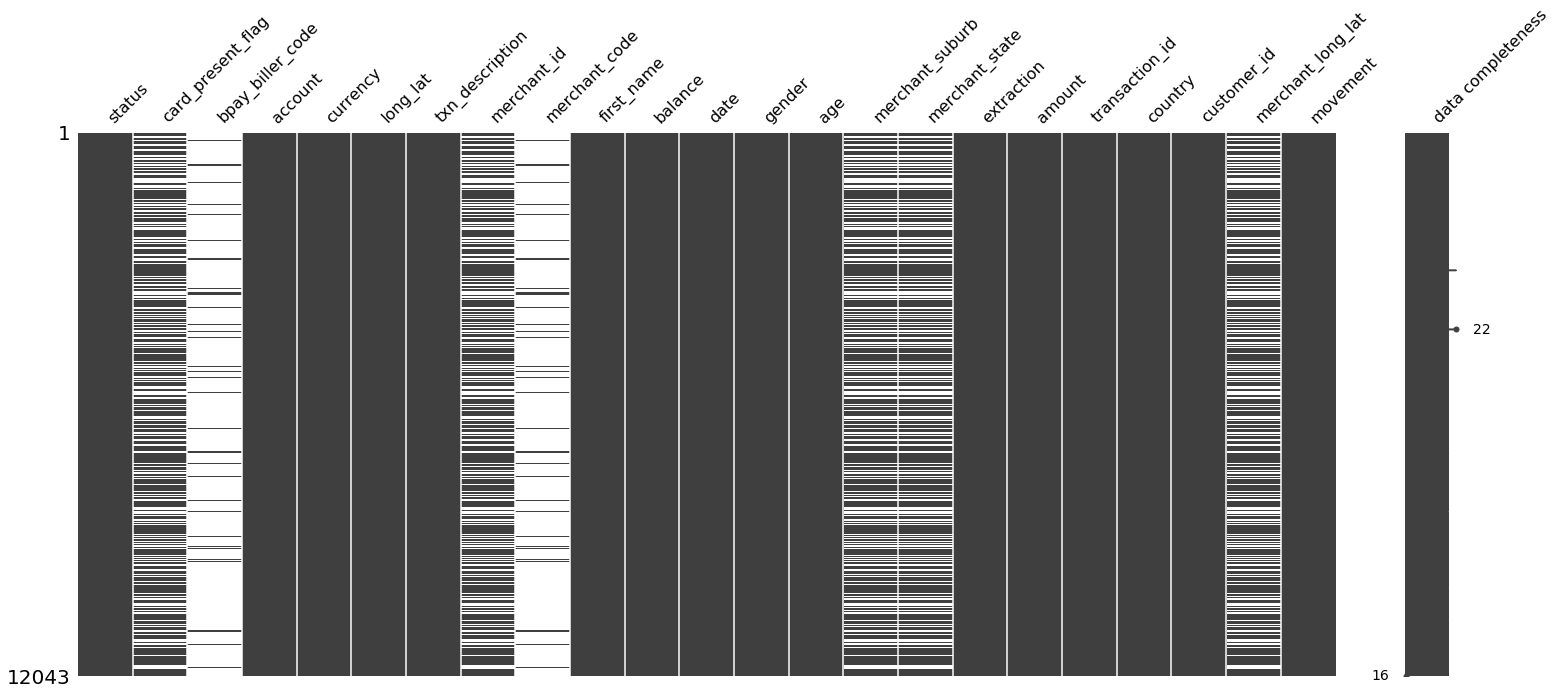

In [9]:
#Missing value
missingno.matrix(data, labels = True)
#Missing value in %.
data.isnull().sum()/data.shape[0]*100

### Findings
1. Merchant related columns are account for majority of the missing value.
    - If merchant_id is missing, it will lead to missing value in rest of the merchat related columns.
    - merchant_suburb, merchant_state and merchant_long_lat follow a highly similar pattern of missing value.
2. card_present_flag: Around 92% of data is missing.
    - it follow the same pattern of missing value with merchant related columns, missing data in this columns in related to merchant. Further investigation is needed.

## Data quality conclusion:
Some data cleaning needed. A few thing to note:
1. Too much missing value in the merchant columns. We investigate the reason in EDA.
2. Some columns may not be useful for machine learning model. We will drop these columns when applying machine learning model.

## Exploratary Data Analysis
We ignore identification columns in the check:
    - bpay_biller_code
    - account
    - first_name
    - merchant_id
    - merchant_id
    - transaction_id
    - customer_id

In [10]:
#Double check the data infomation
data.info()
#data types are already being converted to a suitable form.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

### Findings
1. Columns with 1 unique value
    - Include: currency, country. Maybe not helpful columns for the model to learn.
2. bpay_biller_code has 883 entries with 0
    - out of 885 entries with data, 883 of them are "0". Maybe not helpful for the model to learn.

## Understand data
Next, we exam each individual column, understand its meanings and distribution.

### Status

In [11]:
data.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

Status of each transaction. Authorized: completed transaction. Posted:Still in process
### card_present_flag

In [12]:
data.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [13]:
#missing data(%)
data.card_present_flag.isnull().sum()/data.shape[0]

0.3592128207257328

Whether or not the card is presented in the physical store. 35% are missing values meaning transaction on the internet, over mobile phone, or other means except physical.

### Currency

In [14]:
data.currency.value_counts()

AUD    12043
Name: currency, dtype: int64

The currency of the transaction. Only one unique value. No useful information, will drop this columns later.

### lat long

In [15]:
data.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

Location of the transaction were made.

### txn_description

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

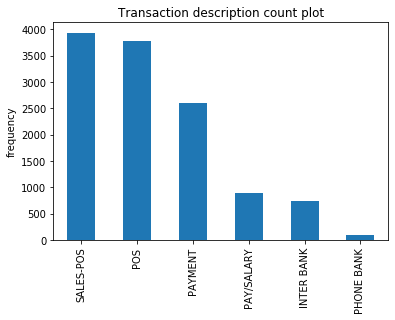

In [16]:
data.txn_description.value_counts().plot(kind='bar')
plt.title('Transaction description count plot')
plt.ylabel('frequency')
data.txn_description.value_counts()

,amount
txn_description,
INTER BANK,86.699461
PAY/SALARY,1898.728029
PAYMENT,77.613077
PHONE BANK,106.099010
POS,40.407412
SALES-POS,39.909789


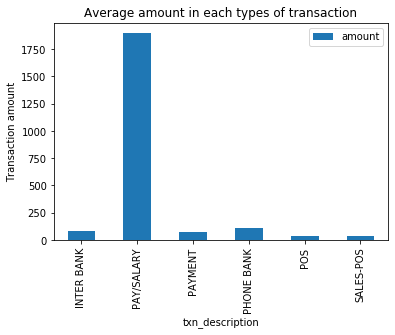

In [17]:
data[['txn_description','amount']].groupby('txn_description',as_index=True).mean().plot(kind='bar')
plt.title('Average amount in each types of transaction')
plt.ylabel('Transaction amount')
data[['txn_description','amount']].groupby('txn_description',as_index=True).mean()

Description of the transaction. Majority are made up by SALES-POS,POS. Followed by Payment. Since not all transaction are sales, this explain why there are missing value in merchant columns.

The Average amount does not seems to be surprice, because salary payments are suppose to be much large than daily transactions.

### balance

In [18]:
data.balance.describe()

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
max      267128.520000
Name: balance, dtype: float64

Text(0, 0.5, 'frequency')

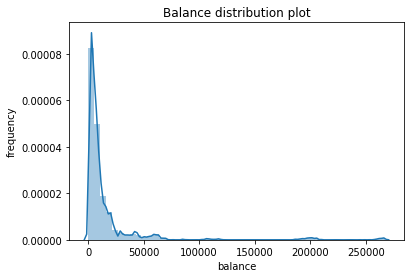

In [19]:
sns.distplot(data.balance)
plt.title('Balance distribution plot')
plt.ylabel('frequency')

Text(0.5, 1.0, 'Balance box plot')

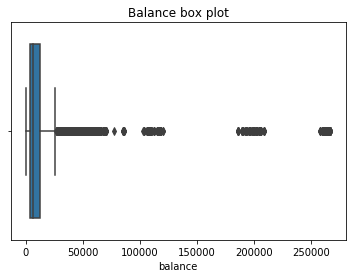

In [20]:
sns.boxplot(data.balance)
plt.title('Balance box plot')

Account Balance. Most of the data are populated below 50,000. We can see some outliers

### Date

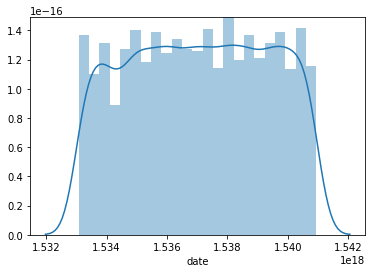

In [21]:
sns.distplot(data.date)

Date of the transactions were made. Remember that there is one missing date - '2018-08-16'.

### Gender

In [22]:
data.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

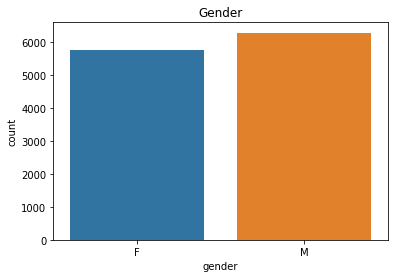

In [23]:
sns.countplot(data.gender)
plt.title('Gender')

Gender of the account owner.

### Age

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

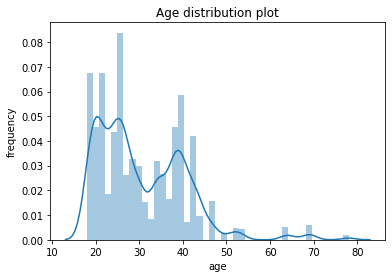

In [24]:
sns.distplot(data.age)
data.age.describe()
plt.title('Age distribution plot')
plt.ylabel('frequency')
data.age.describe()

Age of the account owner.

### Merchant_state

In [25]:
data.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Text(0, 0.5, 'frequency')

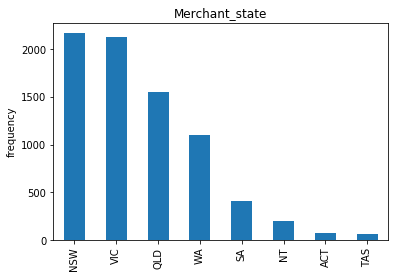

In [26]:
data.merchant_state.value_counts().plot(kind='bar')
plt.title('Merchant_state')
plt.ylabel('frequency')

,amount
merchant_state,
ACT,4876.68
NSW,102021.77
NT,9168.89
QLD,53483.45
SA,16776.57
TAS,1962.93
VIC,87584.00
WA,33992.06


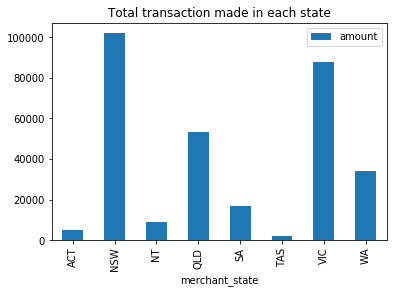

In [27]:
data[['merchant_state','amount']].groupby('merchant_state',as_index=True).sum().plot(kind='bar')
plt.title('Total transaction made in each state')
data[['merchant_state','amount']].groupby('merchant_state',as_index=True).sum()

,amount
merchant_state,
ACT,66.803836
NSW,47.036316
NT,44.726293
QLD,34.372397
SA,40.425470
TAS,28.866618
VIC,41.099953
WA,30.901873


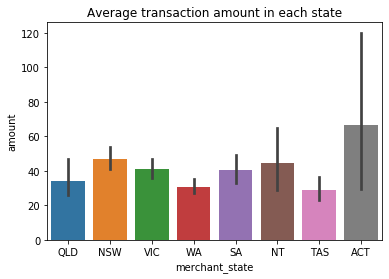

In [28]:
sns.barplot(x='merchant_state',y='amount',data=data)
plt.title('Average transaction amount in each state')
data[['merchant_state','amount']].groupby('merchant_state',as_index=True).mean()

*Note: the vertical black line in the barplot represent the variance, while the height of the bar represent mean.

Indicate in what state the merchants are located.

### Extraction

In [29]:
data.extraction.tail()

12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, dtype: object

In [30]:
data[['date','extraction']]

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000
...,...,...
12038,2018-10-31,2018-10-31T23:09:06.000+0000
12039,2018-10-31,2018-10-31T23:21:46.000+0000
12040,2018-10-31,2018-10-31T23:34:25.000+0000
12041,2018-10-31,2018-10-31T23:47:05.000+0000


Assumed to be the timestamp produced when the transactions were made. Where it supplment the specific time when the transaction in made in a day. Need to extract the time only, since we have date data in the 'date' column.

### Amount

In [31]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

Text(0, 0.5, 'frequency')

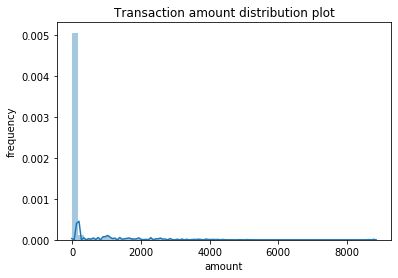

In [32]:
sns.distplot(data.amount)
plt.title('Transaction amount distribution plot')
plt.ylabel('frequency')

Text(0.5, 1.0, 'Transaction amount box plot')

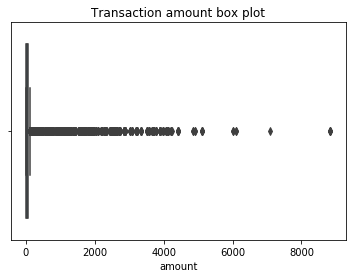

In [33]:
sns.boxplot(data.amount)
plt.title('Transaction amount box plot')

Transaction amount.

### Country

In [34]:
data.country.value_counts()

Australia    12043
Name: country, dtype: int64

In what country the transactions were made. Only one unique value, it will be dropped.

### merchant_long_lat

In [35]:
print(data.merchant_long_lat.head())
print('')
print(data.merchant_long_lat.isnull().sum()/data.shape[0],'of data is missing value')

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

0.3592128207257328 of data is missing value


location of the merchant. 35% were missing data, it could be due to internet transaction.

### Movement

debit     11160
credit      883
Name: movement, dtype: int64

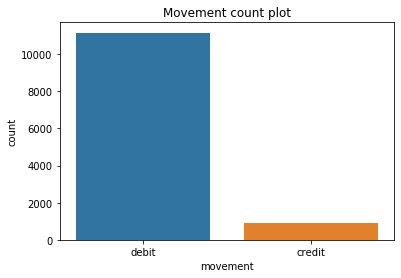

In [36]:
sns.countplot(data.movement)
plt.title('Movement count plot')
data.movement.value_counts()

movement
credit    1898.728029
debit       52.572343
Name: amount, dtype: float64

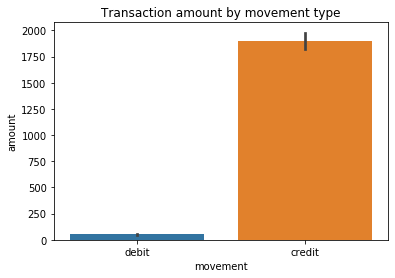

In [37]:
#Find out what movement type have higher transaction amount
sns.barplot(x='movement',y='amount',data=data)
plt.title('Transaction amount by movement type')
data.groupby(['movement']).amount.mean()
#Credit = going out, it is much higher than debit

Credit card is more common to pay for high price good and service (E.g.buying TV and furniture), while debit card is more for paying daily groceries and small transactions.

Credit or debit card used on the transaction.

- Balance and amount has problem with outlier, while age does not.

## Feature Engineering

From the EDA, in order for our model to perform well, we know that we need to drop some columns and outliers.

### Drop unhelpful columns

In [38]:
print(data.shape)
data = data.drop(columns=['currency','country'])
print(data.shape)
data.columns

(12043, 23)
(12043, 21)


Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'long_lat', 'txn_description', 'merchant_id', 'merchant_code',
       'first_name', 'balance', 'date', 'gender', 'age', 'merchant_suburb',
       'merchant_state', 'extraction', 'amount', 'transaction_id',
       'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

### Dealing with missing value

In [39]:
#Columns with missing value
null = data.isnull().sum()
#null[null>0]/data.shape[0]  #In percentage form
null[null>0]                 #In occurance form

card_present_flag     4326
bpay_biller_code     11158
merchant_id           4326
merchant_code        11160
merchant_suburb       4326
merchant_state        4326
merchant_long_lat     4326
dtype: int64

In [40]:
non_sale = data.loc[(data['txn_description'] != 'SALES-POS') | (data['txn_description'] != 'POS')]
null_nonsale = non_sale.isnull().sum()
null_nonsale[null_nonsale>0]
#Hence we could conclude that only transaction with "SALES-POS" and "POS" has data in merchant columns 
#and card_present_flag


card_present_flag     4326
bpay_biller_code     11158
merchant_id           4326
merchant_code        11160
merchant_suburb       4326
merchant_state        4326
merchant_long_lat     4326
dtype: int64

In [41]:
#Fill them with N/A
fill = ['card_present_flag','merchant_id','merchant_id','merchant_code','merchant_suburb',
        'merchant_state','merchant_long_lat']
for i in fill:
    data[i].fillna('N/A', inplace = True)
    
#Drop columns with 93% missing value. Filling these missing value probably not benefit for the model building
not_fill = ['bpay_biller_code','merchant_code']
data.drop(columns=not_fill,inplace = True)

In [42]:
#Make sure no more missing values
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

## Conduct Analysis

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

In [43]:
#What is the aerage transaction amount?
data.amount.mean()

187.93358797641767

In [44]:
#How many transactions do customers make each month, on average?
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
avg_trans = data.groupby(['year','month']).transaction_id.nunique()
print('Average transactions for each month')
print(avg_trans)
print('')
print('Transactions customers make each month, on average is: {}.'.format(int(round(avg_trans.mean(),0))))

Average transactions for each month
year  month
2018  8        3943
      9        4013
      10       4087
Name: transaction_id, dtype: int64

Transactions customers make each month, on average is: 4014.


### Times series analysis - Transaction volumn

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

Text(0, 0.5, 'Number of Transactions')

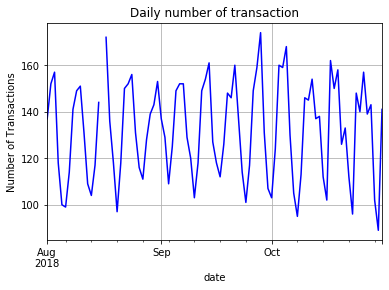

In [45]:
#Daily transaction amount
data[(data['date'] < missing_date[0])].groupby('date').transaction_id.nunique().plot(c='blue')
data[(data.date > missing_date[0])].groupby('date').transaction_id.nunique().plot(c='b')
plt.grid()
plt.title('Daily number of transaction')
plt.ylabel('Number of Transactions')

We can observe a high fluctuation in number of transaction during the 3-month period.

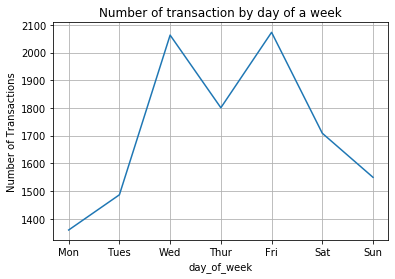

In [46]:
#Transaction by day of a week
data['day_of_week'] = data['date'].apply(lambda x: x.weekday())
data['day_of_week']

#plot
ax = data.groupby('day_of_week').transaction_id.nunique().plot()
# Change 0-6 to Mon-Sun
l = ['Mon', 'Tues', 'Wed','Thur','Fri','Sat','Sun']
x = [0,1,2,3,4,5,6]
ax.set_xticks(x)
ax.set_xticklabels(l)

#Graph title, labels, and so on
ax.grid()
plt.title('Number of transaction by day of a week')
plt.ylabel('Number of Transactions')
plt.show()


#Findings: Wednesday and Friday often observe high transaction volumns.

In [47]:
#what insights can you draw from the location information provided in the dataset?
#First parse the location information: seperate it into lat and long
location = ['long_lat','merchant_long_lat']
data[location]

,long_lat,merchant_long_lat
0,153.41 -27.95,153.38 -27.99
1,153.41 -27.95,151.21 -33.87
2,151.23 -33.94,151.21 -33.87
3,153.10 -27.66,153.05 -26.68
4,153.41 -27.95,153.44 -28.06
...,...,...
12038,149.83 -29.47,145.23 -37.81
12039,151.22 -33.87,150.88 -33.96
12040,151.12 -33.89,150.92 -33.74
12041,144.96 -37.76,145.09 -37.91


In [48]:
data['long'] = data['long_lat'].apply(lambda x: x.partition(' ')[0]).astype('float')
data['lat'] = data['long_lat'].apply(lambda x: x.partition(' ')[2]).astype('float')

#Define a try except function to skip value with "N/A"
def sep(x):
    try:
        x.partition(' ')[0]
    except ValueError:
        pass
    
#missing value in merchant location need to deal with before serperating
data['merchant_long_lat'].fillna('0 0', inplace=True)
data['merchant_long'] = data['merchant_long_lat'].apply(lambda x: sep(x)).astype('float')
data['merchant_lat'] = data['merchant_long_lat'].apply(lambda x: sep(x)).astype('float')

In [49]:
BBox = (data.long.min(),data.long.max(), data.lat.min(), data.lat.max())
BBox

(114.62, 255.0, -573.0, -12.37)

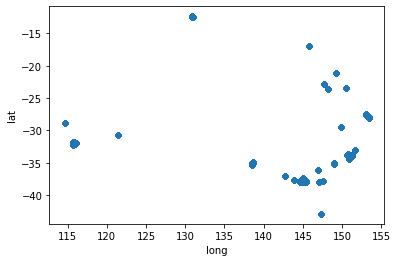

In [55]:
#Mapping number of transaction
mapping = data[data.long < 180].copy()
mapping[['long','lat']].plot(kind='scatter',x='long',y='lat')

In [51]:
#Export dataset and plot location information in tableau, uncomment below
#data.to_excel('cleaned_ANZ synthesised transaction dataset.xlsx', index=False)

In [52]:
#Export dataset
data.to_excel('Task 2 data.xlsx', index = False)

In [53]:
#End of task one